## 7장 8절 시계열 분석

### 시계열 분해

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

In [5]:
df_arima = pd.read_csv('./data/arima_data.csv', names=['day','price'])
df_arima.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [6]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
df_arima['day']=pd.to_datetime(df_arima['day'], format='%Y-%m-%d')
df_arima.set_index('day', inplace=True)
df_arima.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


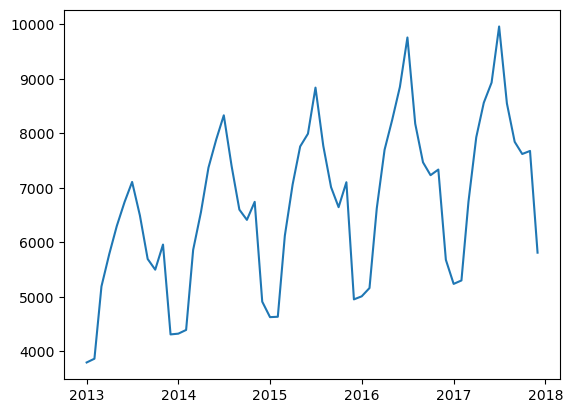

In [10]:
import matplotlib.pyplot as plt
plt.plot(df_arima.index, df_arima['price'])
plt.show()

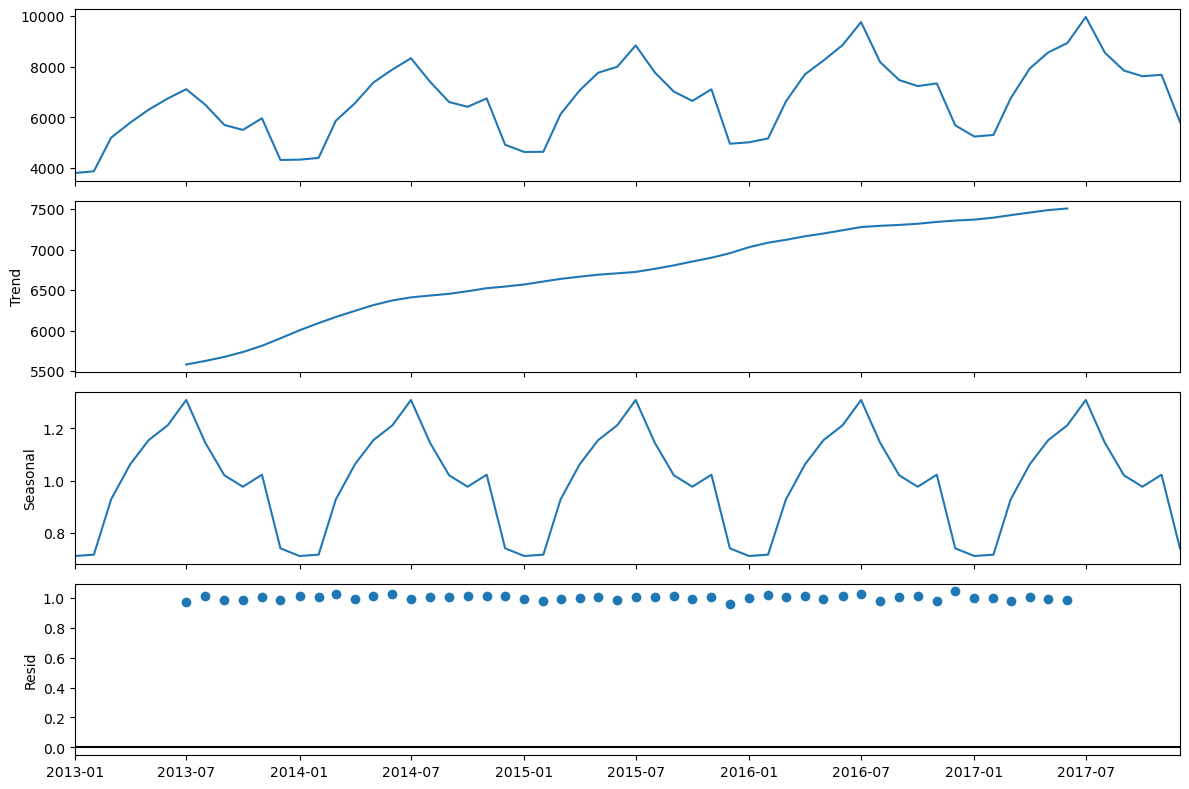

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df_arima
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12,8]
result.plot()
plt.show()

### 2. 정상성 변환

In [17]:
from statsmodels.tsa.stattools import adfuller

train = df_arima[:'2016-12-01']
test = df_arima.drop(train.index)

print(train.shape, test.shape)

adf = adfuller(train, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))

(48, 1) (12, 1)
ADF Statistic: -1.9997199341327232
p-value: 0.6015863303794485


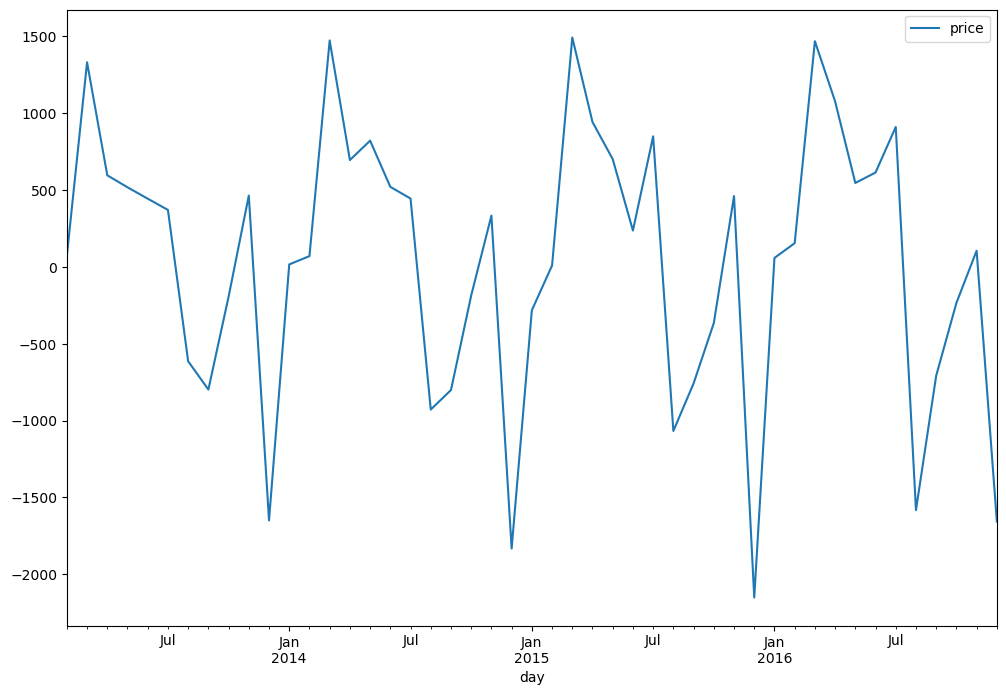

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = train.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()
plt.show()

In [25]:
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))

ADF Statistic: -12.09454757692639
p-value: 2.0851606399613965e-22


### AR 모형과 MA 모형

#### AR(Auto Regressive)

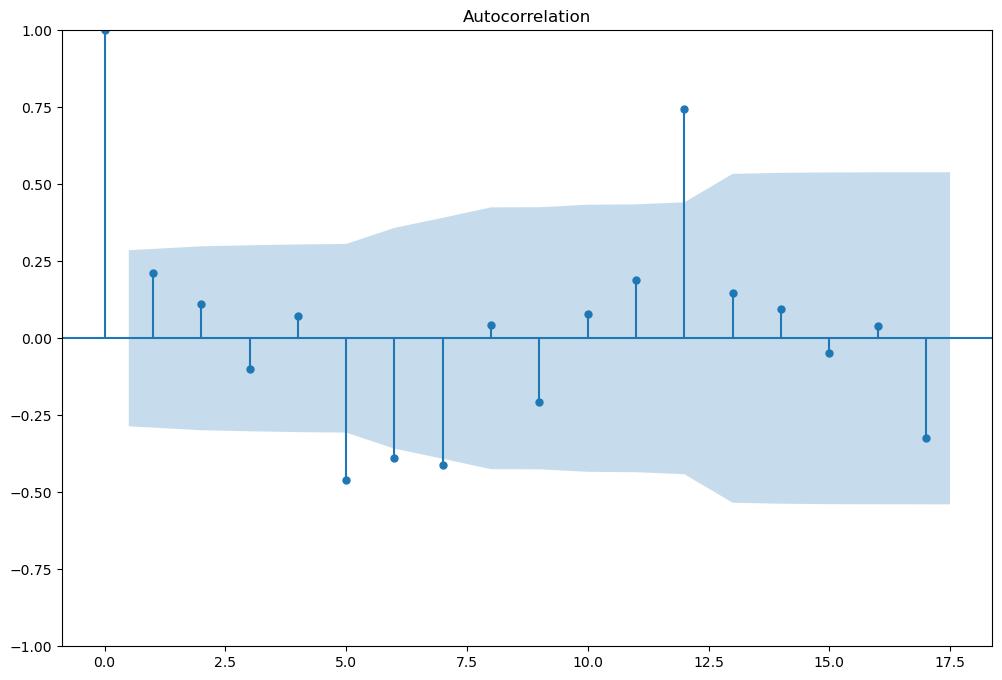

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data)
plt.show()

#### MA(Moving Average)

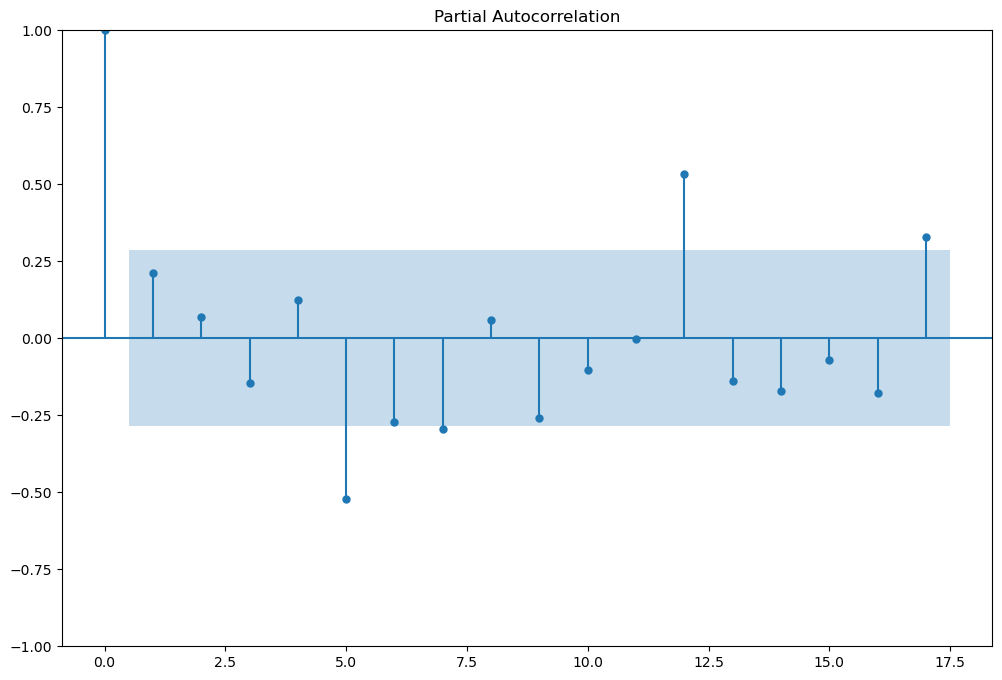

In [27]:
plot_pacf(diff_data)
plt.show()

### ARIMA(Auto-Regressive Intergrated Moving Average)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-01-01 to 2016-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


In [65]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,0,2), trend='ct')
res = model.fit()
res.summary()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -380.820
Date:                Sat, 15 Jun 2024   AIC                            775.641
Time:                        16:44:03   BIC                            788.739
Sample:                    01-01-2013   HQIC                           780.590
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5282.6952    704.053      7.503      0.000    3902.777    6662.613
x1            45.1380     23.319      1.936      0.053      -0.567      90.843
ar.L1         -0.4788      0.167     -2.859      0.004      -0.807      -0.151
ar.L2          0.5170      0.170      3.041      0.002       0.184       0.850
ma.L1          1.9561      0.211      9.249      0.000       1.542       2.371
ma.L2          0.9850      0.214      4.609      0.000       0.566       1.404
sigma2       3.85e+05      0.133   2.89e+06      0.000    3.85e+05    3.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.75   Prob(JB):                         0.48
Heteroskedasticity (H):               1.37   Skew:                            -0.43
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.13e+23. Standard errors may be unstable.
"""

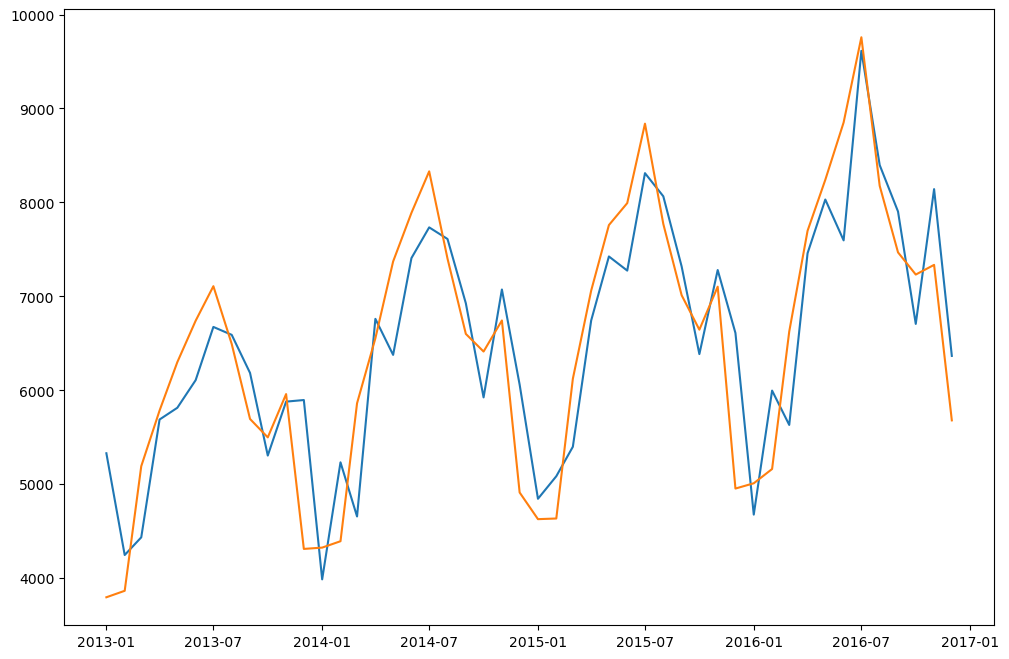

In [66]:
plt.plot(res.predict())
plt.plot(train)
plt.show()

In [67]:
forecast_data = res.forecast(steps=len(test), alpha=0.05)
pred_y = forecast_data
pred_y

2017-01-01    6212.537409
2017-02-01    6581.428130
2017-03-01    7380.747290
2017-04-01    7232.183907
2017-05-01    7759.951320
2017-06-01    7473.885961
2017-07-01    7927.098736
2017-08-01    7605.642276
2017-09-01    8037.256110
2017-10-01    7707.844101
2017-11-01    8132.100646
2017-12-01    7802.098211
Freq: MS, Name: predicted_mean, dtype: float64

In [68]:
test_y = test
test_y


,price
day,
2017-01-01,5236
2017-02-01,5299
2017-03-01,6744
2017-04-01,7927
2017-05-01,8561
2017-06-01,8930
2017-07-01,9960
2017-08-01,8548
2017-09-01,7843


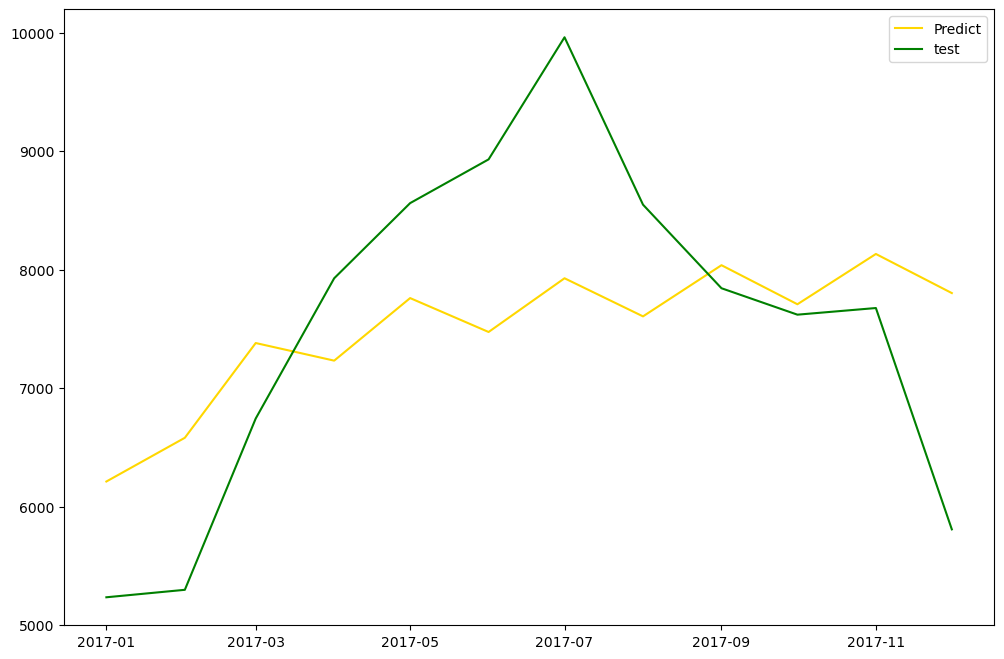

In [69]:
plt.plot(pred_y, color='gold', label='Predict')
plt.plot(test_y, color='green', label='test')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

print('r2_score: ', r2_score(test_y, pred_y))
RMSE = mean_squared_error(test_y, pred_y)**0.5
print('RMSE: ', RMSE)

r2_score:  0.3561176172401004
RMSE:  1136.333898448121
